공부 시간, 과외 시간과 성적 사이의 관계는 좌표로 나타낼 때 형태가 직선으로 해결되는 선형 회귀를 사용하기에 적합했었다.  
공부 시간에 따른 점수가 아닌 합격 여부 발표되는 시험이 있을 경우 직선으로 해결하기에는 적합하지 못한 문제가 발생된다.  
이럴 때 사용하는 로지스틱 회귀는 참과 거짓 중에 하나를 내놓는 과정으로 참과 거짓을 구분한 'S'자를 눕혀놓은 형태의 선을 그어주는 작업이다.
***
참조 사이트  
http://taewan.kim/post/sigmoid_diff/  
https://devlog.jwgo.kr/2018/04/16/sigmoid-graph-according-to-slope-change/

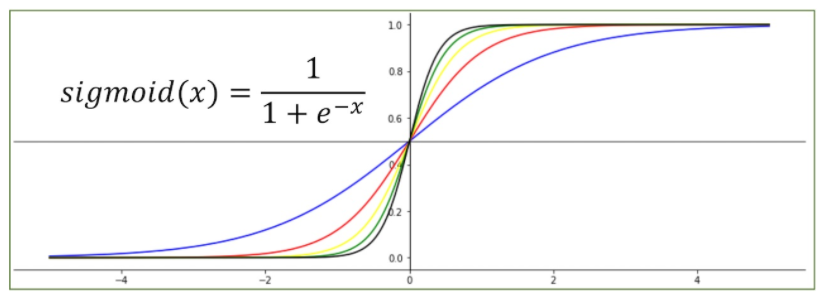

In [1]:
from IPython.display import Image
Image('./numpyImage/sigmoid.png', width=800)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# 공부 시간(x), 합격 여부(y) => [공부 시간, 합격 여부]
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
xData = [i[0] for i in data]
print(xData)
yData = [i[1] for i in data]
print(yData)

[2, 4, 6, 8, 10, 12, 14]
[0, 0, 0, 1, 1, 1, 1]


In [4]:
# 기울기(a), y절편(b) 값을 랜덤한 값으로 정한다.
# random_uniform(): tensorflow에서 균등 분포를 따르는 난수를 발생시킨다.
# random_normal(): tensorflow에서 정규 분포를 따르는 난수를 발생시킨다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a = {}, b = {}'.format(sess.run(a), sess.run(b)))

a = [0.99702694], b = [2.24606373]


 시그모이드 방정식

In [5]:
# np.e: 넘파이에서 지수 값(2.718281828459045)을 의미하는 상수
# print(np.e)
# https://icim.nims.re.kr/post/easyMath/64 참조
y = 1 / (1 + np.e ** -(a * xData + b))

시그모이드 방정식의 오차를 계산하는 함수를 만든다.  
시그모이드 함수의 특성은 예측값(y)이 항상 0 아니면 1이다.

In [6]:
loss = -tf.reduce_mean(np.array(yData) * tf.log(y) + (1 - np.array(yData)) * tf.log(1 - y))

오차를 최소로 하는 값을 찾는다.

In [24]:
gradient_descent = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

학습시킨다.

In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(320001):
    sess.run(gradient_descent)
    # Epoch, 오차, 기울기, y절편
    if i % 10000 == 0:
        print('Epoch: {0:6d}, loss: {1:10.6f}, 기울기: {2:10.6f}, y절편: {3:10.6f}'.format(i, sess.run(loss), sess.run(a)[0], 
                                                                               sess.run(b)[0]))

Epoch:      0, loss:   1.642885, 기울기:   1.268583, y절편:  -1.337228
Epoch:  10000, loss:   0.036740, 기울기:   2.018455, y절편: -13.963296
Epoch:  20000, loss:   0.021635, 기울기:   2.559993, y절편: -17.766165
Epoch:  30000, loss:   0.015308, 기울기:   2.913395, y절편: -20.244243
Epoch:  40000, loss:   0.011823, 기울기:   3.176382, y절편: -22.087316
Epoch:  50000, loss:   0.009620, 기울기:   3.385757, y절편: -23.554241
Epoch:  60000, loss:   0.008103, 기울기:   3.559605, y절편: -24.772046
Epoch:  70000, loss:   0.006996, 기울기:   3.708182, y절편: -25.812703
Epoch:  80000, loss:   0.006153, 기울기:   3.837868, y절편: -26.720964
Epoch:  90000, loss:   0.005490, 기울기:   3.952900, y절편: -27.526552
Epoch: 100000, loss:   0.004955, 기울기:   4.056239, y절편: -28.250211
Epoch: 110000, loss:   0.004515, 기울기:   4.150031, y절편: -28.906986
Epoch: 120000, loss:   0.004146, 기울기:   4.235882, y절편: -29.508139
Epoch: 130000, loss:   0.003832, 기울기:   4.315026, y절편: -30.062313
Epoch: 140000, loss:   0.003563, 기울기:   4.388431, y절편: -30.576287
Epoch: 150